# Coding the problem

In [1]:
import math as mt
import random as rnd
import statistics as stats
from deap import base, creator, tools
import matplotlib.pyplot as plt

Landscape definition

In [2]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1
domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = mt.fabs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
    
    return (a + b + 0.5),

def evaluate(individual):
    x = individual[0]
    y = individual[1]
    return f(x,y)

# Defining the elements

In [3]:
# Algorithm parameters

# Genes
gen_size = 2
# Population Size
pop_size = 20
# Progeny size
b_ratio = 3
par_size = b_ratio * pop_size

# Progeny parameters
## Crossover probability per gene
cx_pb = .5
## Mutation probability per gene
mut_pb = .5
## Mutation strength
sigma = 2.5


# Selection by tournament
# Tournament size parent selection
k_par=2
# Tournament size survivor selection
k_sur=6

# Maximum generation number
gen_end = 5000


In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [5]:
toolbox = base.Toolbox()

In [6]:
toolbox.register("attr_float", rnd.uniform, -15, 15)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=gen_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:
toolbox.register("evaluate", evaluate)

toolbox.register("mate", tools.cxUniform, indpb=cx_pb)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=sigma, indpb=mut_pb)

toolbox.register("par_select", tools.selTournament, tournsize=k_p)
toolbox.register("sur_select", tools.selTournament, tournsize=k_s)

In [8]:
stat = tools.Statistics(key=lambda ind: ind.fitness.values[0])

stat.register('med', stats.median)
stat.register('avg', stats.mean)
stat.register('std', stats.stdev)
stat.register('best', min)
stat.register('worst', max)

In [9]:
pop = toolbox.population(n=pop_size)

In [10]:
fitnesses = toolbox.map(toolbox.evaluate, pop)
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [11]:
logbook = tools.Logbook()
record = stat.compile(pop)
logbook.record(gen=0, **record)

In [12]:
%%time
for g in range(gen_end):
    # Select Parents and clone them as base for offsprings
    parents = toolbox.par_select(pop, par_size)
    offspring = [toolbox.clone(ind) for ind in pop]
    
    # Aplly crossover    
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values, child2.fitness.values
    
    # Apply mutation
    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values
    
    fitnesses = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
    
    pop = toolbox.sur_select((pop+offspring), pop_size)
    
    record = stat.compile(pop)
    logbook.record(gen=g+1, **record)

Wall time: 10.3 s


In [13]:
gen = logbook.select('gen')
fit_best = logbook.select('best')
fit_med = logbook.select('med')

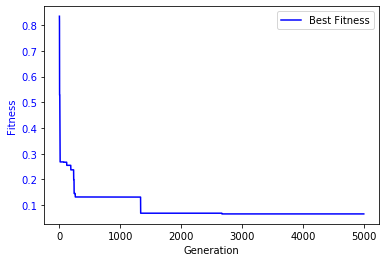

In [15]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_best, "b-", label="Best Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")
    
ax1.legend()

In [16]:
type(logbook)

deap.tools.support.Logbook

In [19]:
type(logbook[0])

dict

In [20]:
len(logbook)

5001